<a href="https://colab.research.google.com/github/Hackerdash/Hackerdash/blob/main/hwrc/hwcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Process of TesserAct**

In [ ]:
!pip install opencv-python
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,962 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow

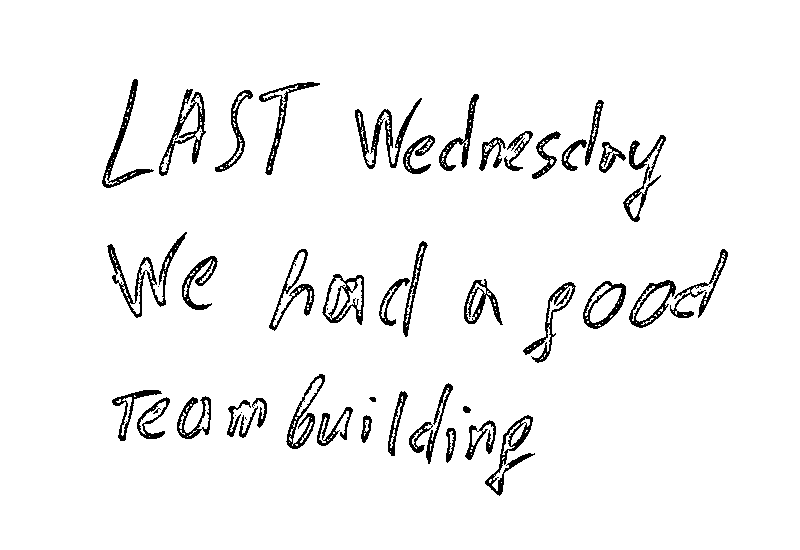


Image is loaded succesfully


In [ ]:
img = cv2.imread('/content/handwritten2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
reduced_noise = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,12)
cv2_imshow(reduced_noise)
cv2.waitKey(0)
print("\nImage is loaded succesfully")

In [ ]:
text=pytesseract.image_to_string(reduced_noise,lang='eng')
print("The text is :\n",text)

The text is :
 LA 5 7 Wednesdby
We fad a good

720 ip building



# **Handwritten Characters Recognition model**


In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Machine lEARNING Model preparation
from sklearn.utils import shuffle #For shuffling the Images data

In [7]:
!pip install gdown
!gdown 15SkxycP5N3PA6Da80PuE_7eREL6kTWBx

Downloading...
From: https://drive.google.com/uc?id=15SkxycP5N3PA6Da80PuE_7eREL6kTWBx
To: /content/A_Z Handwritten Data.csv
100% 699M/699M [00:23<00:00, 29.3MB/s]


In [9]:
data = pd.read_csv(r"/content/A_Z Handwritten Data.csv").astype('float32')
print(data.head(10)) #We are getting first ten images data
#This data set contains all the Images in data form

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [10]:
#The ‘0’ contains the labels, & so we drop the ‘0’ column from the data dataframe read
X = data.drop('0',axis = 1)
y = data['0'] #and put the 0 column in the label y

In [11]:
#IN this step Machine learning Model preparation for spliting test and Train data. We
#Test size would be your choise here I put it 0.2 % data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
#The below step  is to reshape the Image and Label data according to our requirement
#shape size would be [28,28]

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)
#After printing you will get the Train Data "Train data shape:  (297960, 28, 28)"
#After printing you will get the Test Data "Test data shape:  (74490, 28, 28)"

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [12]:
#This is the self made dictionary of Alphabets agains number 0 will be A , 1 will be B and so on
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',
             11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',
             21:'V',22:'W',23:'X', 24:'Y',25:'Z'}


In [13]:
#This count list has the number of images present in the dataset belonging to each alphabet.
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
print(count)
for i in y_int:
   count[i] +=1
    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
#We get the list named alphabets for the Comparision purpose 
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

In [15]:
alphabets[1]

'B'

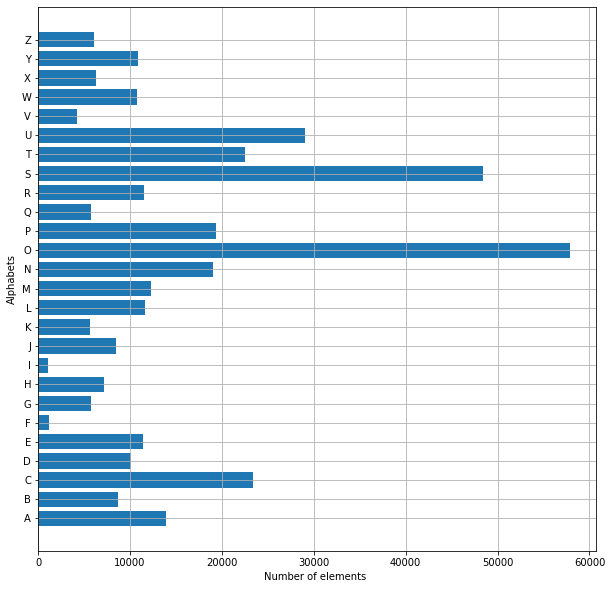

In [16]:
#We are ploting the bar graph of size 10 , 10
#In which we can clearly see that Alphabets "o" frequency is greater than 50,000 
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

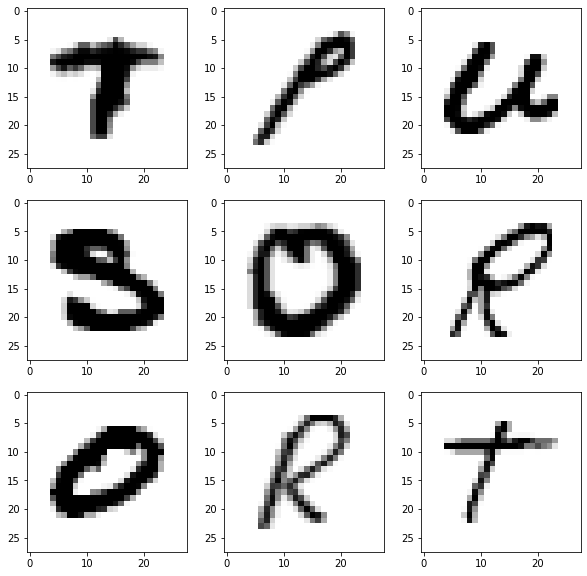

In [17]:
#Here we will shuffle the images data to get the random alphabets for accuracy purpose. 
#We then create 9 plots data:image/png;base64,
shuff = shuffle(train_x[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [18]:
#Data Reshaping
#We changed the Images reshaping to "New shape of train data:  (297960, 28, 28, 1)" 
#For both Train and Test data
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)

print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [19]:
#Here we convert the single float values to categorical values.
#This is done as the CNN model takes input of labels & generates 
#the output as a vector of probabilities.
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [20]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
import tensorflow

# Tensor Flow has different features and CNN is one of them. Its getting the data as a input
# Then its convolute the images with many different layers
# After Convoluation there are pooling layers
# The convolution layers are generally followed by maxpool layers that are used to reduce the
# number of features extracted and ultimately the output of the maxpool and layers
# and convolution layers are flattened into a vector of single dimension and are given as an 
#input to the Dense layer
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [21]:
# After adding the layers on the model we have finally in situtation to compile and fit the Model.
# Here you can check the accuracy is upto the mark. More than 95%
#where we define the optimizing function & the loss function to be used for fitting.
#The optimizing function used is Adam,(Tensorflow - > You can check the literature of it also)
#that is a combination of RMSprop & Adagram optimizing algorithms.
#loss: 0.1576 - accuracy: 0.9569 - val_loss: 0.0840 - val_accuracy: 0.9767

model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 400s 43ms/step - loss: 0.1686 - accuracy: 0.9527 - val_loss: 0.0888 - val_accuracy: 0.9766


In [22]:
#Here we will save the Model summar I am using my notebook in same folder So , I used the 
#Same path for this but you can save it on your selected location
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [23]:
# Here have accuracy results of 
#The validation accuracy is : [0.9766814112663269]
#The training accuracy is : [0.9568800926208496]
#The validation loss is : [0.08401237428188324]
#The training loss is : [0.15755431354045868]
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9766411781311035]
The training accuracy is : [0.9526983499526978]
The validation loss is : [0.0888415202498436]
The training loss is : [0.16863660514354706]


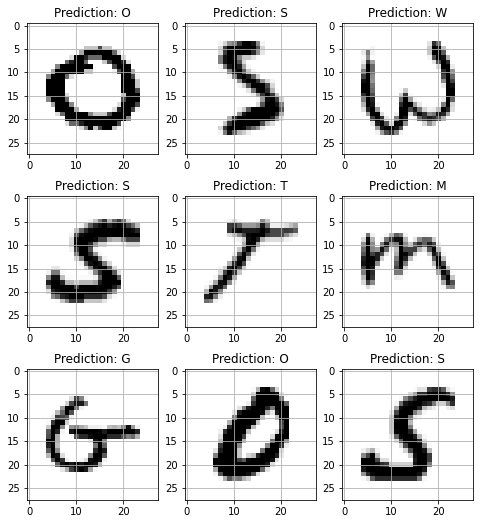

In [24]:
# Now we will finally have the things to show on the graph we are getting 9 images from
# The train set 
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
# To showing the 9 images we will loop though the data from test model and will predict the 
# images on the basis of CNN model of keras/tensorflow. 
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()
#Here we go below are the results 

In [36]:
# You can write your selected alphabet on paper and then click the image and upload it on the 
# Jupyter
img = cv2.imread(r'/content/image.png')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))


In [37]:
#Gaussain Method used for Blur checking
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

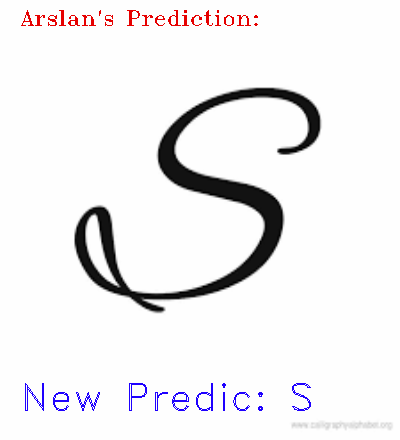

In [38]:
from google.colab.patches import cv2_imshow
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Arslan's Prediction: ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "New Predic: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2_imshow(img)#'Dataflair handwritten character recognition _ _ _ ',

# **process of easyocr**




In [39]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 10 kB/s 
     |████████████████████████████████| 47.6 MB 75 kB/s 


In [40]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [46]:
path="/content/index.png"
img=cv2.imread(path)

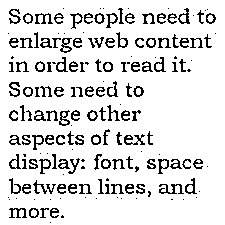

In [48]:
cv2_imshow(img)

In [54]:
reader = easyocr.Reader(['en'])
result = reader.readtext(img)
#result
for text in result:
  print(text[1])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Some people need to
'enlarge web content
in order to read it:
Some need to
change other
aspects of text
display: font; space
between lines, and
more_
